In [5]:
import nltk
from nltk.book import *
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import gutenberg

In [6]:
emma = gutenberg.words('austen-emma.txt')

In [11]:
for fileid in gutenberg.fileids():
    chars = len(gutenberg.raw(fileid))
    words = len(gutenberg.words(fileid))
    sents = len(gutenberg.sents(fileid))
    vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(chars/words), round(words/sents), round(words/vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


In [12]:
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')

In [13]:
macbeth_sentences

[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

In [14]:
from nltk.corpus import webtext

In [15]:
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


In [20]:
from nltk.corpus import reuters
#reuters.categories()

In [22]:
from nltk.corpus import inaugural
#inaugural.fileids()
#[fileid[:4] for fileid in inaugural.fileids()]

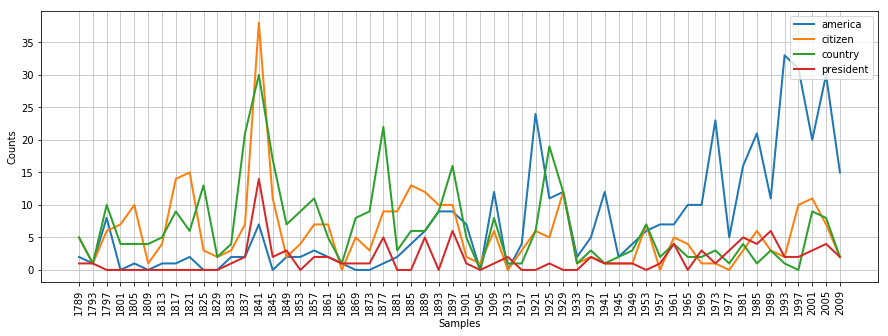

In [33]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4]) 
    for fileid in inaugural.fileids() 
    for w in inaugural.words(fileid) 
    for target in ['america', 'citizen', 'country', 'president'] 
    if w.lower().startswith(target)
)
plt.figure(figsize=[15,5])
cfd.plot()

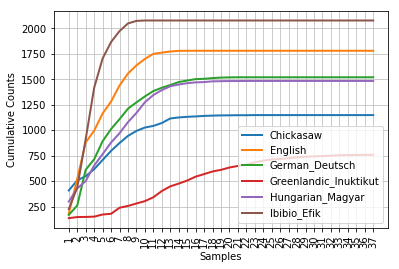

In [37]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch','Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))
cfd.plot(cumulative=True)

In [38]:
raw = gutenberg.raw("burgess-busterbrown.txt")
raw[1:20]

'The Adventures of B'

In [40]:
words = gutenberg.words("burgess-busterbrown.txt")
words[1:20]

['The',
 'Adventures',
 'of',
 'Buster',
 'Bear',
 'by',
 'Thornton',
 'W',
 '.',
 'Burgess',
 '1920',
 ']',
 'I',
 'BUSTER',
 'BEAR',
 'GOES',
 'FISHING',
 'Buster',
 'Bear']

In [41]:
entries = nltk.corpus.cmudict.entries()
len(entries)

133737

In [42]:
for entry in entries[42371:42379]:
    print(entry)

('fir', ['F', 'ER1'])
('fire', ['F', 'AY1', 'ER0'])
('fire', ['F', 'AY1', 'R'])
('firearm', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M'])
('firearm', ['F', 'AY1', 'R', 'AA2', 'R', 'M'])
('firearms', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M', 'Z'])
('firearms', ['F', 'AY1', 'R', 'AA2', 'R', 'M', 'Z'])
('fireball', ['F', 'AY1', 'ER0', 'B', 'AO2', 'L'])


In [43]:
for word, pron in entries:
    if len(pron) == 3:
        ph1, ph2, ph3 = pron
        if ph1 == 'P' and ph3 == 'T':
             print(word, ph2, end=' ')

pait EY1 pat AE1 pate EY1 patt AE1 peart ER1 peat IY1 peet IY1 peete IY1 pert ER1 pet EH1 pete IY1 pett EH1 piet IY1 piette IY1 pit IH1 pitt IH1 pot AA1 pote OW1 pott AA1 pout AW1 puett UW1 purt ER1 put UH1 putt AH1 

In [53]:
entries = nltk.corpus.names.words()

In [59]:
startletters = list(map(lambda n: n[0], entries))

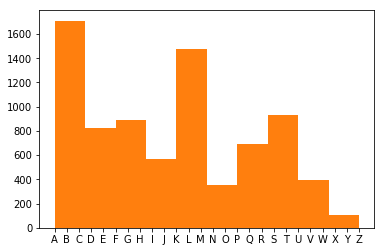

In [64]:
plt.hist(startletters)
plt.show()

In [67]:
names = nltk.corpus.names.fileids()

cfd = nltk.ConditionalFreqDist(
    (target, file_id) 
    for fileid in names.fileids() 
    for w in names.words(fileid) 
    for target[0] in
    if w.lower().startswith(target)
)
plt.figure(figsize=[15,5])
cfd.plot()

SyntaxError: invalid syntax (<ipython-input-67-87a537b92836>, line 8)

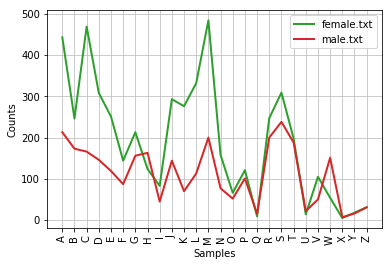

In [74]:
names = nltk.corpus.names
cfd = nltk.ConditionalFreqDist(
    (fileid, name[0])
    for fileid in names.fileids()
    for name in names.words(fileid)
)
cfd.plot()